In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [3]:
pl.style.use('fabiostyle')

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'lick_behavior_FIGURES'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [12]:
sessions ='pre', 'post', 'post_hiatus'

In [13]:
#pre_animals_dHPC  = 'dHPC4_145','dHPC5_1','dHPC5_2','dHPC5_3'
pre_animals_vHPC = 'c18m9', 'vNAc7', '94', '96', '100', '99', '98', '104'
post_animals_vHPC = 'c18m9', 'vNAc7', '94', '96', '100', '99', '98', '104'
postH_animals_vHPC = 'c18m9', 'vNAc7', '94', '96', '100', '99', '98', '104'
pre_animals_dHPC = 'dNAc3', 'dNAc4', 'dhpc37', 'dhpc39', 'dhpc40'
post_animals_dHPC = 'dNAc3', 'dNAc4', 'dhpc37', 'dhpc39', 'dhpc40'
postH_animals_dHPC = 'dNAc3', 'dNAc4', 'dhpc37', 'dhpc39', 'dhpc40'

tot_animals_pre = pre_animals_dHPC + pre_animals_vHPC
tot_animals_post = post_animals_dHPC + post_animals_vHPC
tot_animals_postH = postH_animals_dHPC + postH_animals_vHPC

# Preprocess

In [14]:
for area in ['v','d','t']:
        for trial in ['STIM1','STIM2','STIM3','STIM4']:
            if area == 'v':
                for day in ['pre','post', 'post_hiatus']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    if day == 'pre':
                        for ani in pre_animals_vHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    elif day == 'post':
                        for ani in post_animals_vHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    else:
                        for ani in postH_animals_vHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            elif area == 'd':
                for day in ['pre','post', 'post_hiatus']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    if day == 'pre':
                        for ani in pre_animals_dHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    elif day == 'post':
                        for ani in post_animals_dHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    else:
                        for ani in postH_animals_dHPC:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
            else:
                for day in ['pre','post', 'post_hiatus']:
                    exec("%s_tc_%s_%s = []"%(day,area,trial))
                    if day == 'pre':
                        for ani in tot_animals_pre:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    elif day == 'post':
                        for ani in tot_animals_post:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))
                    else:
                        for ani in tot_animals_postH:
                            exec("licks_tc=ut.load_variable('licks_tc','../%s/%s/notebooks/autorestore/preprocessing')"%(ani,day))
                            exec("%s=ut.load_variable('is_%st','../%s/%s/notebooks/autorestore/preprocessing')"%(trial,trial,ani,day))
                            exec("%s_tc_%s_%s.append(np.mean(licks_tc[%s]))"%(day,area,trial,trial))

In [15]:
for area in ['v','d','t']:
    if area == 'v':
        for day in ['pre','post','post_hiatus']:
            exec("%s_di_%s = []"%(day,area))
            if day == 'pre':
                for ani in pre_animals_vHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            elif day == 'post':
                for ani in post_animals_vHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in postH_animals_vHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
    elif area == 'd':
        for day in ['pre','post','post_hiatus']:
            exec("%s_di_%s = []"%(day,area))
            if day == 'pre':
                for ani in pre_animals_dHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            elif day == 'post':
                for ani in post_animals_dHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in postH_animals_dHPC:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
    else:
        for day in ['pre','post','post_hiatus']:
            exec("%s_di_%s = []"%(day,area))
            if day == 'pre':
                for ani in tot_animals_pre:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            elif day == 'post':
                for ani in tot_animals_post:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))
            else:
                for ani in tot_animals_postH:
                    exec("%s_di_%s.append(ut.load_variable('lick_di','../%s/%s/notebooks/autorestore/preprocessing'))"%(day,area,ani,day))

In [33]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p*mcc
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+.2,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [34]:
def report_stats (array1, array2, sig_func=None,mcc=1,loops=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [35]:
from matplotlib.patches import Patch

In [36]:
import os
os.getcwd()

'/media/data/DATA1/data/odor_ass_learning_2019/4odor_revision/results/notebooks'

In [37]:
def plot_single_session_type(labels, area, to_plot):
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    tt_colors = ['rebeccapurple','m','c','seagreen']
    fig, ax = pl.subplots(figsize=(.8,1.2))
    pvs=[]
    
    for day,i in zip(to_plot,range(1)):
        co=0
        for odor in ['STIM1','STIM2']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1
        co=2
        for odor in ['STIM3','STIM4']:
            exec("%s_tc_%s_%s = [x/2 for x in %s_tc_%s_%s]"%(day,area,odor,day,area,odor))
            exec("e = np.array(sstats.sem(%s_tc_%s_%s))"%(day,area,odor))
            exec("ax.bar(i - width/2 + co*width+.1, np.mean(%s_tc_%s_%s), width,color=tt_colors[co],yerr=e)"%(day,area,odor))
            exec("ax.scatter(i-width/2+ co*width+.1+np.random.random(np.array(%s_tc_%s_%s).size)*width/2-width/4.5,%s_tc_%s_%s,\
                  color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')"%(day,area,odor,day,area,odor))
            co=co+1
            
    t_reward_pre = pre_tc_t_STIM1 + pre_tc_t_STIM2
    t_CSm_pre = pre_tc_t_STIM3 + pre_tc_t_STIM4
    t_reward_post = post_tc_t_STIM1 + post_tc_t_STIM2
    t_CSm_post = post_tc_t_STIM3 + post_tc_t_STIM4
    t_reward_post_hiatus = post_hiatus_tc_t_STIM1 + post_hiatus_tc_t_STIM2
    t_CSm_post_hiatus = post_hiatus_tc_t_STIM3 + post_hiatus_tc_t_STIM4
    
    for day in to_plot:
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM1, %s_tc_%s_STIM2,-.12,0.12,19.5,mcc=2))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, %s_tc_%s_STIM3, %s_tc_%s_STIM4,-.12 +.7,0.12+.7,19.5,mcc=2))"%(day,area,day,area))
        exec("pvs.append(add_significance(ax, t_reward_%s, t_CSm_%s,-.12,0.12 + 0.65,22,mcc=2))"%(day,day))
        print day,'CS+ v CS+',eval("report_stats(%s_tc_%s_STIM1, %s_tc_%s_STIM2,mcc=2,loops=len(%s_tc_%s_STIM1))"%(day,area,day,area,day,area))
        print day,'CS- v CS-',eval("report_stats(%s_tc_%s_STIM3, %s_tc_%s_STIM4,mcc=2,loops=len(%s_tc_%s_STIM3))"%(day,area,day,area,day,area))
        print day,'CS+ v CS-',eval("report_stats(t_reward_%s, t_CSm_%s,mcc=2,loops=len(%s_tc_%s_STIM1))"%(day,day,day,area))
    
    ax.set_ylabel('Trace Lick Rate (Hz)',fontsize=6)
    #ax.set_title('Decoding During CS')
    ax.set_ylim(-.03,20)
    x = [.3]
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend([Patch(facecolor='mediumpurple'),Patch(facecolor='m'), Patch(facecolor='c'), Patch(facecolor='g')],['CS1','CS2','CS3','CS4'],loc=(1,.8),frameon=False)
    ax.tick_params(axis='x',bottom=False)

    pl.suptitle('Avg. Lick Rates',y=1.2,fontsize=6)

    fig.savefig('../figures/%s_4odor_all_mice_trace_lick_bars_%s.pdf'%(NOTEBOOK_NAME, labels[0]))

0.572553030754
0.181973583701
0.00603376895748
pre CS+ v CS+ U = 96.0 p = 1.14510606151 r = 0.120726545488
None
pre CS- v CS- U = 58.0 p = 0.363947167402 r = -0.26157418189
None
pre CS+ v CS- U = 488.5 p = 0.012067537915 r = 4.06949063749
None
0.608076879466
0.813636109879
5.91052605897e-10
post CS+ v CS+ U = 95.0 p = 1.21615375893 r = 0.110666000031
None
post CS- v CS- U = 79.5 p = 1.62727221976 r = -0.0452724545579
None
post CS+ v CS- U = 676.0 p = 1.18210521179e-09 r = 5.95584291073
None
0.857531087859
0.0325688245244
6.40681957292e-10
post_hiatus CS+ v CS+ U = 88.5 p = 1.71506217572 r = 0.0452724545579
None
post_hiatus CS- v CS- U = 42.5 p = 0.0651376490487 r = -0.417512636479
None
post_hiatus CS+ v CS- U = 676.0 p = 1.28136391458e-09 r = 5.95584291073
None


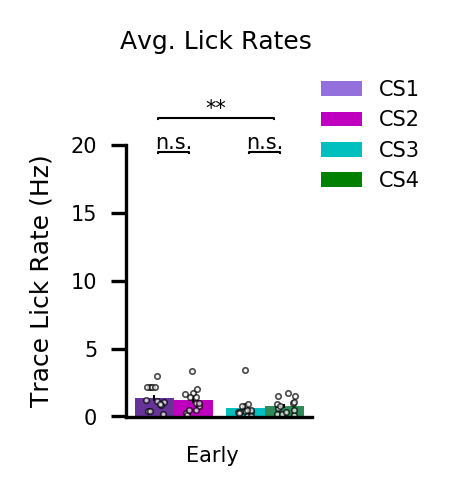

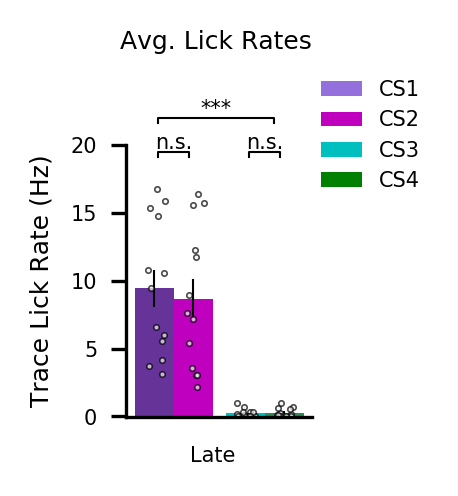

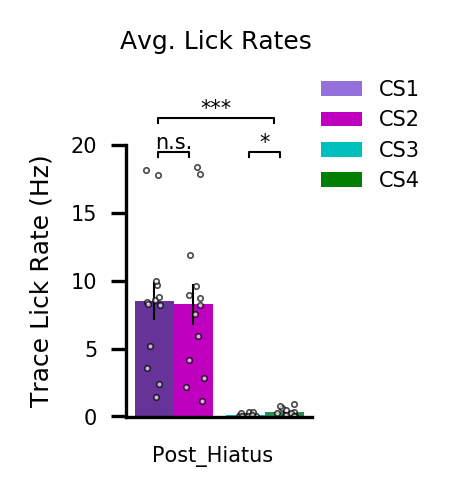

In [38]:
plot_single_session_type(['Early'], 't', ['pre'])
plot_single_session_type(['Late'], 't', ['post'])
plot_single_session_type(['Post_Hiatus'], 't', ['post_hiatus'])